In [13]:
from data_loader import read_tif, replace_invalid_and_crop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/training_data_S2/image_metadata.csv')

In [4]:
df = df[df['market'] == 1]
df

,image_file_path,market_days,market,min_value,max_value,std_dev,country
0,training_data_S2/images/lon-0_0107lat37_6608_0...,"[0, 0, 1, 0, 0, 0, 0]",1,-inf,4.090491,NaN,Kenya
1,training_data_S2/images/lon-0_0107lat37_6608_1...,"[0, 0, 1, 0, 0, 0, 0]",1,-inf,5.272071,NaN,Kenya
2,training_data_S2/images/lon-0_0195lat35_9627_0...,"[0, 0, 1, 0, 0, 0, 0]",1,-inf,9.794985,NaN,Kenya
3,training_data_S2/images/lon-0_0195lat35_9627_1...,"[0, 0, 1, 0, 0, 0, 0]",1,-inf,9.794985,NaN,Kenya
4,training_data_S2/images/lon-0_0246lat34_746_0.tif,"[0, 0, 0, 1, 0, 0, 1]",1,-inf,3.320477,NaN,Kenya
...,...,...,...,...,...,...,...
3139,training_data_S2/images/lon32_9298lat2_3194_1.tif,"[1, 0, 0, 0, 0, 0, 0]",1,-1.289689,49.669113,1.046062,Uganda
3140,training_data_S2/images/lon32_9307lat2_6035_0.tif,"[0, 0, 1, 0, 0, 0, 0]",1,-inf,4.725111,NaN,Uganda
3141,training_data_S2/images/lon32_9307lat2_6035_1.tif,"[0, 0, 1, 0, 0, 0, 0]",1,-3.395823,4.725111,0.249345,Uganda
3142,training_data_S2/images/lon32_9346lat2_4866_0.tif,"[0, 0, 0, 0, 0, 0, 1]",1,-7.064735,3.073965,0.301001,Uganda


In [14]:
arr = read_tif(df.iloc[0,0])
arr = replace_invalid_and_crop(arr, 128)
print(arr.shape)

(7, 128, 128)


In [20]:
row

image_file_path    training_data_S2/images/lon-0_0107lat37_6608_0...
market_days                                    [0, 0, 1, 0, 0, 0, 0]
market                                                             1
min_value                                                       -inf
max_value                                                   4.090491
std_dev                                                          NaN
country                                                        Kenya
Name: 0, dtype: object

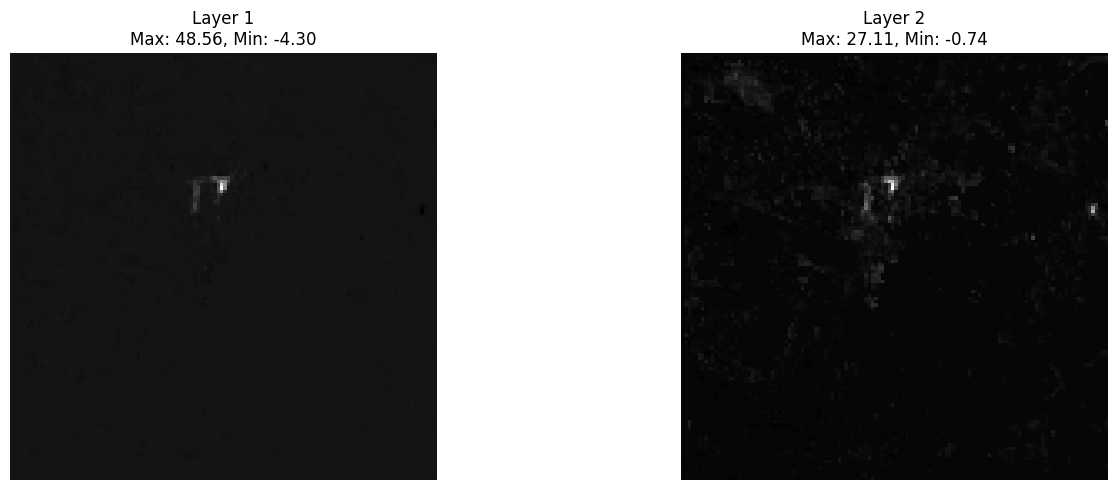

In [36]:
row = df.iloc[5,:]
arr = replace_invalid_and_crop(read_tif(row['image_file_path']))
day_vec = np.array(eval(row['market_days']))
filtered_arr = arr[day_vec == 1]
num_layers = filtered_arr.shape[0]
fig, axes = plt.subplots(1, num_layers, figsize=(15, 5))

if num_layers == 1:
    axes = [axes]

for i in range(num_layers):
    ax = axes[i]
    ax.imshow(filtered_arr[i], cmap='gray')
    ax.set_title(f'Layer {i+1}\nMax: {filtered_arr[i].max():.2f}, Min: {filtered_arr[i].min():.2f}')
    ax.axis('off')

plt.tight_layout()
plt.show()

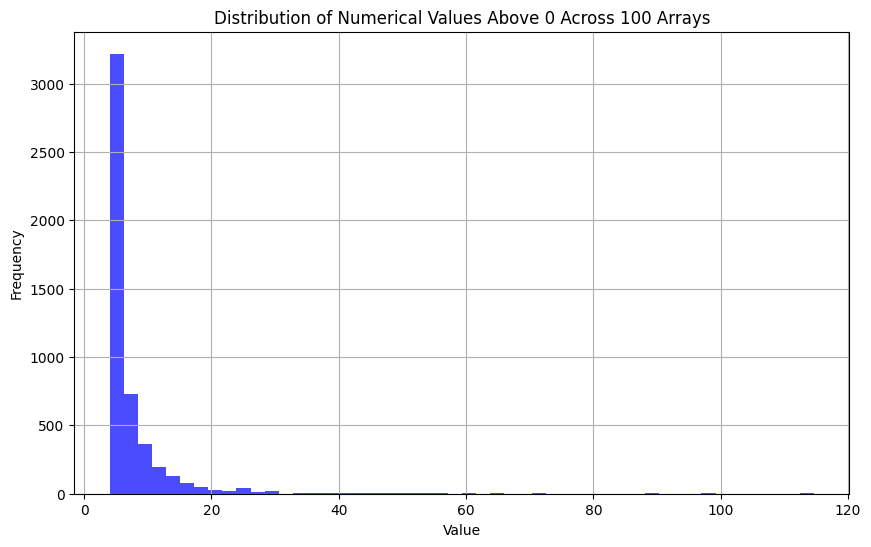

In [41]:
arrays = []
for idx in range(100):
    image_path = df.iloc[idx]['image_file_path']
    arr = read_tif(image_path)
    arr = replace_invalid_and_crop(arr, 128)  # Ensure all arrays have the same shape
    arrays.append(arr)

# Convert the list of arrays to a single numpy array
arrays_np = np.array(arrays)

# Flatten the array to get all numerical values
flattened_values = arrays_np.flatten()

# Filter values to only include those above 0
filtered_values = flattened_values[flattened_values > 4]

# Plot the distribution of numerical values above 0
plt.figure(figsize=(10, 6))
plt.hist(filtered_values, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Numerical Values Above 0 Across 100 Arrays')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
day_slice = images_np[idx_in_batch, day_index, :, :, 0]
label_vec = labels_np[idx_in_batch]  # shape (8,)

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(day_slice, cmap='gray', vmin=lower, vmax=upper)
plt.title(f"Day {day_index} slice, label={label_vec}")
plt.colorbar()
plt.show()